Строим двухмерную гистограмму для выяснения зависимости между расстоянием
(от старта каскада до детектора) и временем активации детектора

Распределение точек рождения каскада в пространстве (3-хмерное)

Распределение углов направлений каскадов, выяснение правильности значения угла
theta (между осью OZ и вектором направления каскада)

In [7]:
def load_data_from_csv(filename : str):
    # loading and returning ndarray type
    import pandas as pd
    data_frame = pd.read_csv(filename, index_col=0)
    return data_frame.to_numpy()

import os
default_csv_data_folder="../csv_data/data1"
csvs_filenames = os.listdir(default_csv_data_folder)
for csv_filename in csvs_filenames:
    cc = 0
    relative_path = default_csv_data_folder + "/" + csv_filename
    if ("dataset" in csv_filename):
        current_array = load_data_from_csv(relative_path)
        for sample in current_array:
            if (sample[5] > 0):
                cc += 1
        print(relative_path, cc / len(current_array))

../csv_data/data1/dataset-16480670030.csv 0.0024449453788798333
../csv_data/data1/dataset-16480690170.csv 0.005945488169515546
../csv_data/data1/dataset-16480701720.csv 0.004006234485943543
../csv_data/data1/dataset-16480713590.csv 0.001683375080264018


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(pd.__version__, np.__version__)

1.3.3 1.21.2


In [87]:
# Альтернативные формулы расчета величин

# pho_cc = (x_cc**2 + y_cc**2)**0.5
# theta_cc = np.arctan2((x_cc**2 + y_cc**2)**0.5, z_cc)
# phi_cc = np.arctan2(y_cc, x_cc)

In [9]:
def load_data_from_csv(filename : str):
    # loading and returning ndarray type
    import pandas as pd
    data_frame = pd.read_csv(filename, index_col=0)
    return data_frame.to_numpy()


def build_histogram(data : list, title : str = "histogram", n_bins : int = 10, param_range : tuple = (False, False)):
    import matplotlib.pyplot as plt

    # do not know how to fo same more reliable, sorry
    used_range = ()
    first, second = param_range
    if (first == second == False):
        used_range = (data.min(), data.max())
    else:
        used_range = param_range

    plt.hist(data, bins=n_bins, range=used_range)
    plt.title(title)
    plt.show()


def load_multiple_csvs(sample_data : list, default_csv_data_folder : str = "./csv_data"):
    '''
        returns nothing!\n
        fill input array with data
    '''
    import os
    csvs_filenames = os.listdir(default_csv_data_folder)
    
    numpy_arrays = []
    for csv_filename in csvs_filenames:
        relative_path = default_csv_data_folder + "/" + csv_filename
        if ("dataset" in csv_filename):
            current_array = load_data_from_csv(relative_path)
            numpy_arrays.append(current_array)

    sample_data.append(np.concatenate(numpy_arrays))

In [81]:
sample_data = []
load_multiple_csvs(sample_data, default_csv_data_folder="../csv_data/data1")
sample_data = sample_data[0]

# опять аномалии
sample_data = np.array([sample for sample in sample_data if sample[5] < 1 or np.isnan(sample[5])])
print(len(sample_data))

sample_data_swaped = sample_data.swapaxes(0, 1)
#sample_data_swaped[5] = np.log(sample_data_swaped[5])

print([(i, prob) for (i, prob) in zip(range(len(sample_data_swaped[5])), sample_data_swaped[5]) if (prob > 1)])

data_cols_labels = ["z", "rho", "theta", 
                    "phi", "activation_time", "probs_mult",
                    "targer_det", "x_dir", "y_dir", "z_dir", "x_loc", "y_loc", "z_loc"]

692684
[]


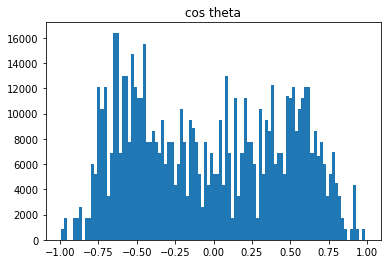

In [85]:
sample_data_swaped[2] = np.cos(sample_data_swaped[2])
build_histogram(sample_data_swaped[2], n_bins=100, title="cos theta")

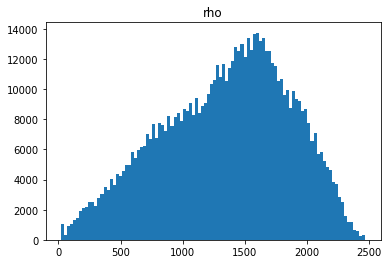

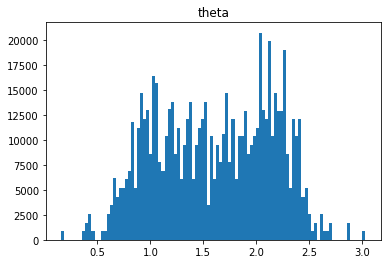

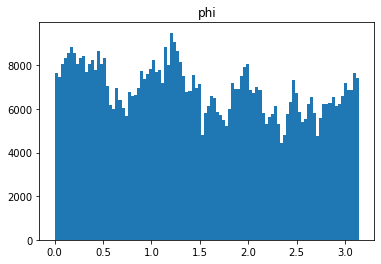

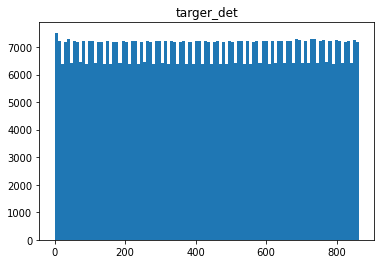

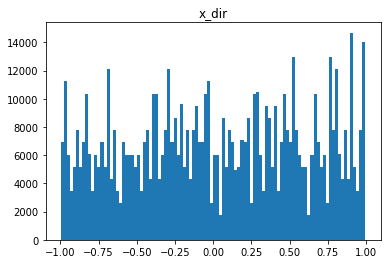

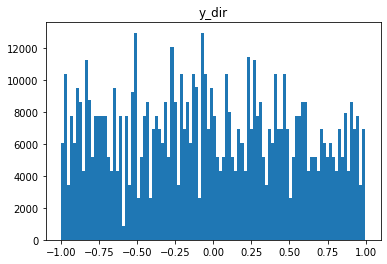

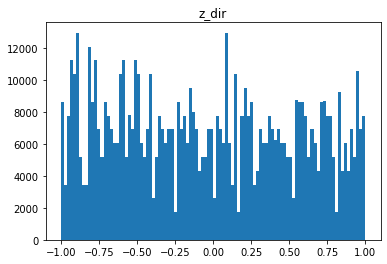

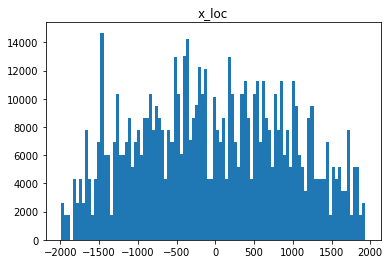

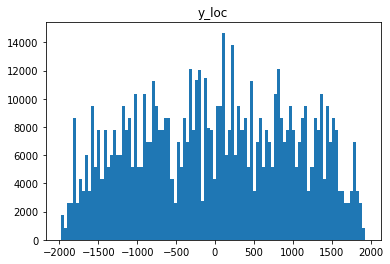

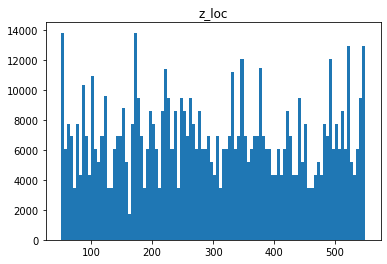

In [82]:
for (col_label, i) in zip(data_cols_labels, range(len(data_cols_labels))):
    if (i in (1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13)):
        build_histogram(sample_data_swaped[i], n_bins=100, title=col_label)

In [49]:
dets_count = 864
sample_data_low = []
for i in range(len(sample_data)):
    if (i % dets_count == 0):
        sample_data_low.append(sample_data[i])

#print(sample_data_low)
sample_data_low = np.array(sample_data_low).swapaxes(0, 1)

In [50]:
import plotly.express as px
loc_data_df = pd.DataFrame({
    "x": sample_data_low[10],
    "y": sample_data_low[11],
    "z": sample_data_low[12]
})
print(loc_data_df)

               x            y           z
0   -1271.837158 -1182.796509   68.714226
1    -137.280807 -1851.888794  336.684998
2   -1034.456665  1542.293213  401.596191
3     661.021606   195.332535  504.195221
4    -601.253479   853.768738  378.504425
..           ...          ...         ...
797  -366.201721  1317.601440  324.220581
798 -1475.462036  -119.216988  496.483032
799  -396.053558 -1586.802612  310.927704
800  -188.269638   157.616455  259.039185
801  1255.559937 -1193.112549  548.477417

[802 rows x 3 columns]


In [80]:
fig = px.scatter_3d(loc_data_df, x='x', y='y', z='z')
# zaxis = dict(
#             range=[0, 600]
#         )
# fig.update_layout(zaxis=zaxis)
fig.update_traces(marker=dict(size=4))

fig.show()

In [54]:
# датасет чисто из хитов для 2д гистограммы

sample_data = []
load_multiple_csvs(sample_data, default_csv_data_folder="../csv_data/hits_ext")
sample_data = sample_data[0]

sample_data = np.array([sample for sample in sample_data if sample[5] < 1 or np.isnan(sample[5])])
print(len(sample_data))

6132


In [62]:
def get_det_coords(detectors_coords_list : list):
    csv_data_default_folder = "./"
    csv_default_filename = "../assist_data/detector_coords.csv"

    full_relative_name = csv_data_default_folder + "/" + csv_default_filename
    csv_raw_data = pd.read_csv(full_relative_name, index_col=0)
    for row in csv_raw_data.iterrows():
        # `uid` is equal list idxs, dont need to add same info
        current_det = {"x": row[1][7], "y": row[1][8], "z": row[1][9]}
        detectors_coords_list.append(current_det)

det_coords = []
get_det_coords(det_coords)
print(*det_coords[432].values())

data_cols_labels = ["z", "rho", "theta", 
                    "phi", "activation_time", "probs_mult",
                    "targer_det", "x_dir", "y_dir", "z_dir", "x_loc", "y_loc", "z_loc"]

-270.50860595703125 -420.2135925292969 98.30014038085938


In [72]:
def get_dist(l1 : list, l2 : list):
    return np.sqrt(pow(l1[0] - l2[0], 2) + pow(l1[1] - l2[1], 2) + pow(l1[2] - l2[2], 2))

lens = []
times = []
for sample in sample_data:
    det_c = [*det_coords[int(sample[6])].values()]
    cas_c = [*sample[10:13]]

    lens.append(get_dist(det_c, cas_c))
    times.append(sample[4])

print(len(lens))

two_dim_data_df = pd.DataFrame({
    "x": lens,
    "y": times
})

6132


In [86]:
import plotly.express as px
df = px.data.tips()
fig = px.density_heatmap(two_dim_data_df, x="x", y="y", marginal_x="histogram", marginal_y="histogram")
fig.update_layout(scene = dict(zaxis = dict(type = 'log')))
fig.show()